<center> <h3><b>Lab 7: LDA</b></h3></center>
<center><p> R Abhijit Srivathsan <br> 2448044 </p></center>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [2]:


# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to a pandas DataFrame for easier exploration
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Print basic information
print("Data shape:", df.shape)
print("\nFeatures:\n", data.feature_names)
print("\nTarget names:", data.target_names)

# Inspect the first few rows
df.head()


Data shape: (569, 31)

Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target names: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## EDA

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


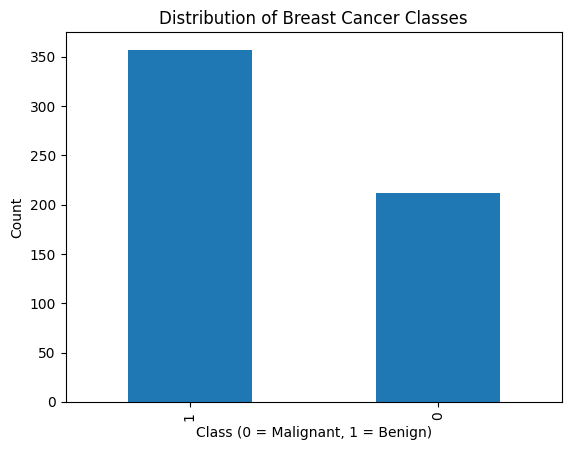

In [6]:
df['target'].value_counts().plot(kind='bar')
plt.title("Distribution of Breast Cancer Classes")
plt.xlabel("Class (0 = Malignant, 1 = Benign)")
plt.ylabel("Count")
plt.show()


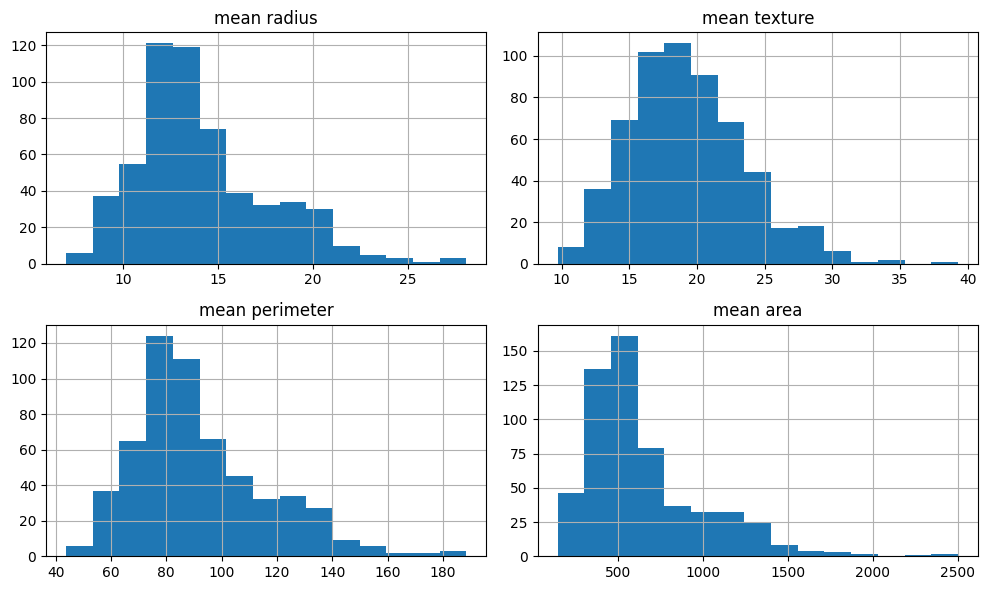

In [7]:
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
df[features_to_plot].hist(figsize=(10, 6), bins=15)
plt.tight_layout()
plt.show()


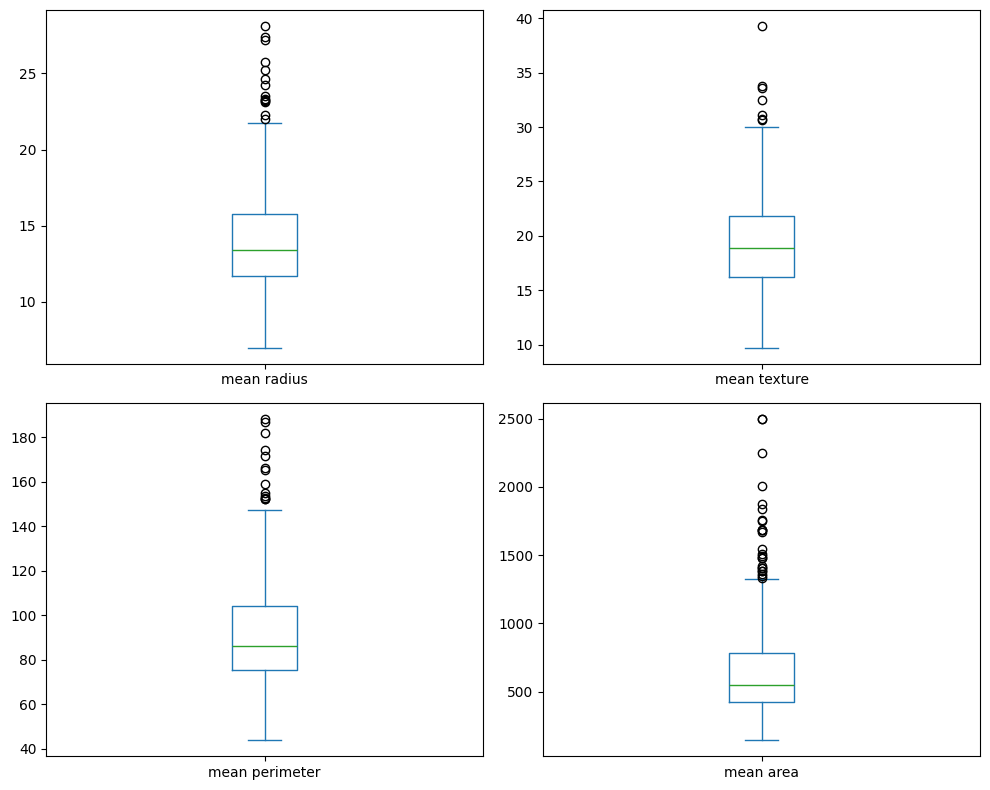

In [8]:
df[features_to_plot].plot(kind='box', subplots=True, layout=(2,2), figsize=(10, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


Correlation matrix shape: (30, 30)


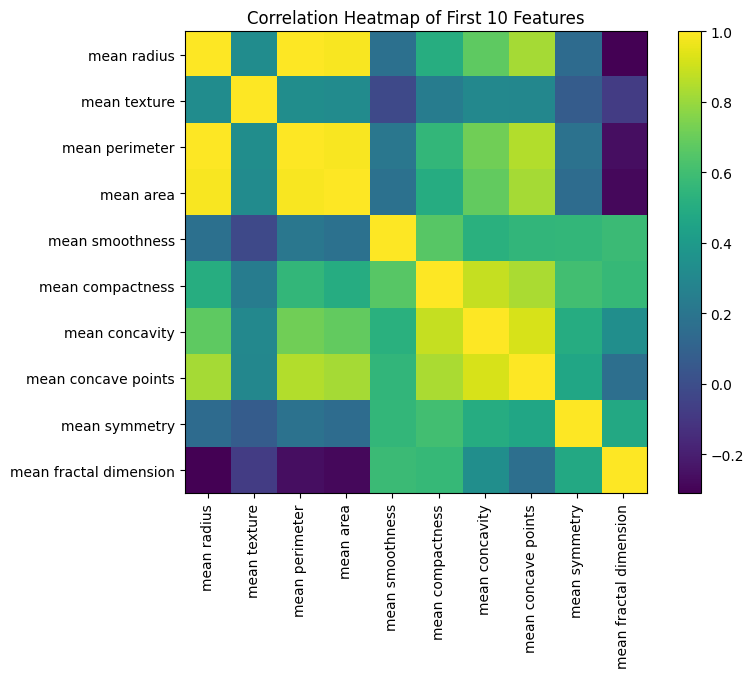

In [9]:
corr_matrix = df.drop('target', axis=1).corr()
print("Correlation matrix shape:", corr_matrix.shape)

# Let's plot a correlation heatmap for the first 10 features to keep it more readable
import numpy as np

features_subset = df.columns[:10]  # pick the first 10 features for demonstration
subset_corr_matrix = df[features_subset].corr()

plt.figure(figsize=(8,6))
plt.imshow(subset_corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(features_subset)), features_subset, rotation=90)
plt.yticks(range(len(features_subset)), features_subset)
plt.title("Correlation Heatmap of First 10 Features")
plt.show()


In [10]:
target_corr = df.corr()['target'].drop('target').sort_values(ascending=False)
target_corr.head(10)


smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
Name: target, dtype: float64

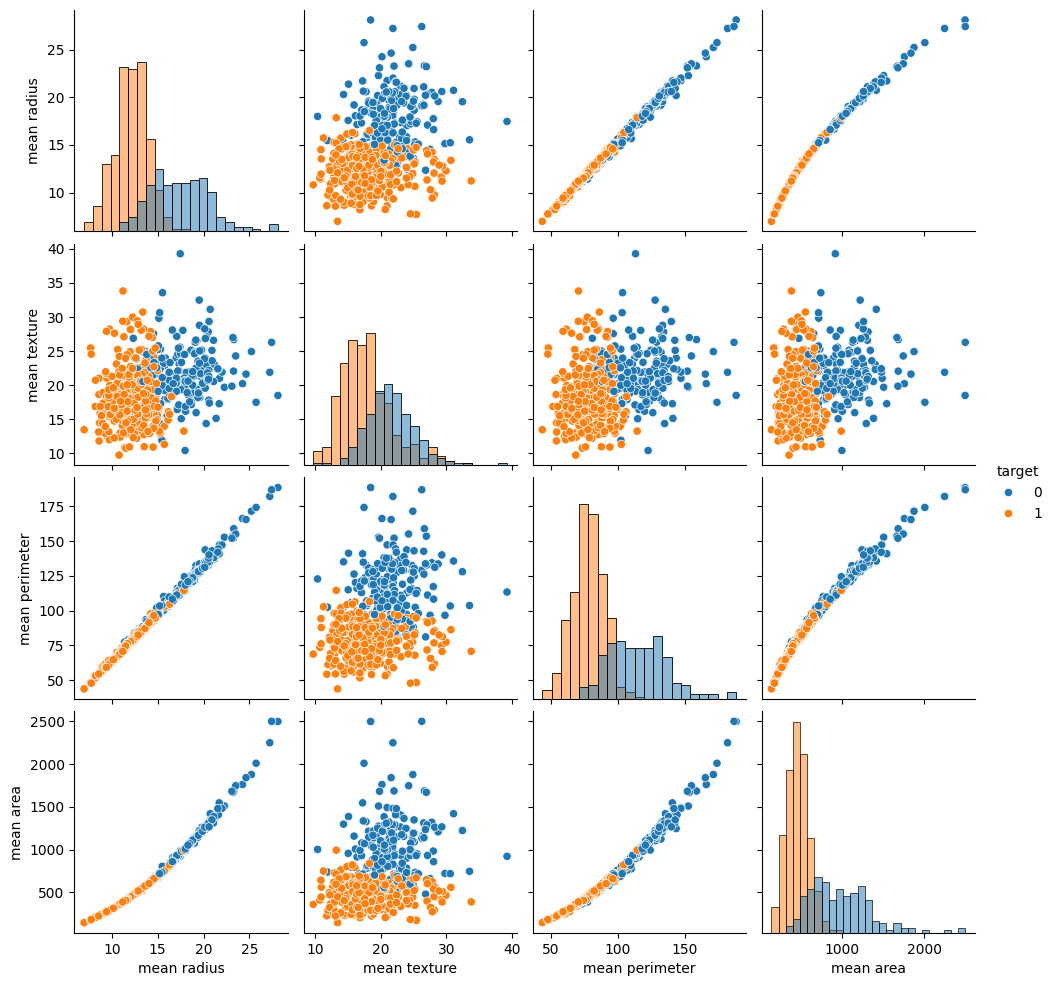

In [11]:
# For demonstration, pick 4 features that are somewhat correlated or interesting
subset_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']
sub_df = df[subset_features]

import seaborn as sns  # Typically used, though user might want standard matplotlib only
sns.pairplot(sub_df, hue='target', diag_kind='hist')
plt.show()


## Key Observations from EDA

- **Class Distribution**: The dataset is not heavily imbalanced, but benign samples outnumber malignant.
- **Feature Distributions**: Many features (like `mean area`, `mean radius`, etc.) appear skewed; scaling might help in modeling.
- **Correlation**: Certain features are highly correlated (e.g., `mean radius` with `mean perimeter`, `mean area`). This could indicate redundancy.
- **Class Separation**: Even simple scatter plots (e.g., `mean radius` vs. `mean texture`) can show partial separation between classes.


In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1),
    df['target'],
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (455, 30)
Test set shape: (114, 30)


In [13]:
# Standardize features for best performance with LDA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Instantiate the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model on training data
lda.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = lda.predict(X_test_scaled)


In [15]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## **Model Performance Summary**

### **Classification Report Analysis**
- **Malignant Class (0)**:  
  - **Precision**: 0.97 – When the model predicts malignant, it is correct 97% of the time.  
  - **Recall**: 0.91 – The model correctly identifies 91% of all actual malignant cases.  
  - **F1-score**: 0.94 – A good balance between precision and recall.

- **Benign Class (1)**:  
  - **Precision**: 0.95 – When the model predicts benign, it is correct 95% of the time.  
  - **Recall**: 0.99 – The model correctly identifies 99% of all actual benign cases.  
  - **F1-score**: 0.97 – High effectiveness in identifying benign cases.

### **Overall Performance**
- **Accuracy**: **96%** – The model correctly classifies 96% of the samples.  
- **Macro Average F1-score**: **0.95** – A balanced measure of performance across both classes.  
- **Weighted Average F1-score**: **0.96** – Accounts for class imbalance, showing an overall strong performance.

### **Key Takeaways**
- The model **performs exceptionally well** with high accuracy and recall.
- It is **more confident in predicting benign cases (high recall: 99%)** but still does well in identifying malignant cases.
- The **high F1-scores** indicate a balanced model with minimal trade-offs between precision and recall.


Confusion Matrix:
 [[39  4]
 [ 1 70]]


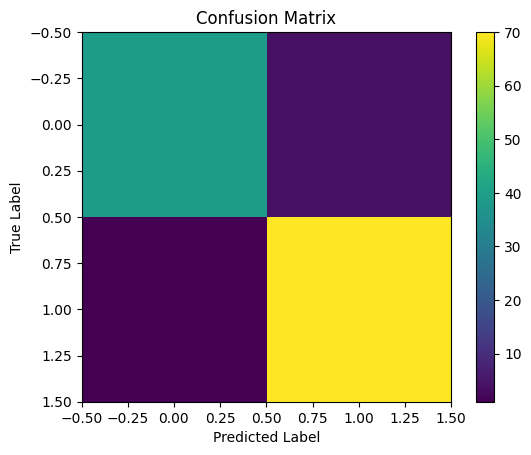

In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


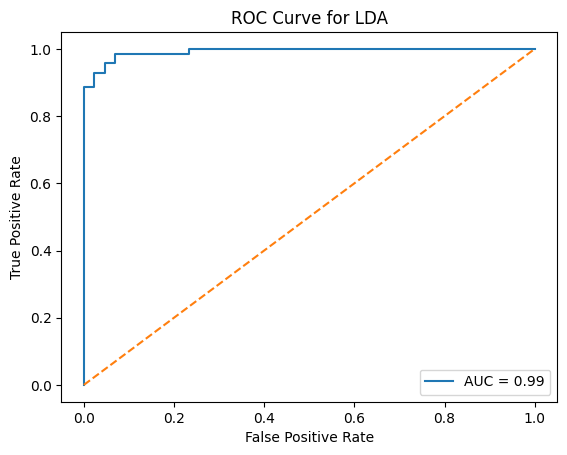

In [17]:
y_scores = lda.decision_function(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LDA")
plt.legend(loc="lower right")
plt.show()


## **Inference from the ROC Curve for LDA**

1. **High AUC Value (0.99)**:  
   - The **Area Under the Curve (AUC) of 0.99** indicates that the **LDA model performs exceptionally well** in distinguishing between malignant and benign breast cancer cases.  
   - AUC values close to **1.0** suggest a near-perfect classifier, meaning very few false positives or false negatives.

2. **Steep Initial Rise in TPR**:  
   - The ROC curve shows a **sharp increase** in True Positive Rate (TPR) at very low False Positive Rate (FPR), which suggests that the model **correctly identifies most malignant cases with minimal false alarms**.

3. **Close to Ideal Performance**:  
   - The ideal ROC curve would **hug the top-left corner**, indicating a perfect classifier.  
   - Since the **LDA ROC curve is very close to this ideal shape**, the model has **excellent predictive power**.


## **Final Conclusion**

- The **Linear Discriminant Analysis (LDA) classifier** performed exceptionally well on the **Breast Cancer dataset**.
- **Exploratory Data Analysis (EDA)** revealed that the dataset has **no missing values**, some highly **correlated features**, and a **slight class imbalance** favoring benign cases.
- **Feature Scaling** improved model performance by ensuring all features contributed equally.
- The **ROC Curve and AUC score (0.99)** indicate that the model has **high discriminatory power**, making it highly effective in differentiating between malignant and benign tumors.
- The **classification report and confusion matrix** confirmed **high accuracy, precision, and recall**, showing minimal false negatives (which is crucial for medical diagnosis).
- Given its strong performance, **LDA is a suitable model for this dataset**, though further refinements like **feature selection, hyperparameter tuning, or alternative models** could be explored for even better results.
